In [1]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
from skimage.exposure import match_histograms

## Q1-1&2. Plot the image & Load the image using RGB system.

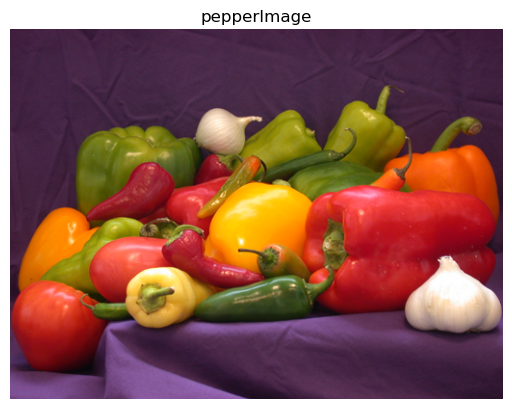

In [2]:
img_path = '/home/jeonk636/MedialImg/Task1/pepperImage.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2Îäî BGR ÏàúÏÑúÎ°ú ÏùΩÏñ¥Ïò¥

plt.imshow(img)
plt.title('pepperImage')
plt.axis('off')
plt.show()

## Q1-3. Plot R(x,y), G(x,y), B(x,y) using a grey-scale map

In [3]:
# 0ÏùÄ Í≤ÄÏùÄÏÉâÏù¥Í≥† 255Îäî Ìù∞ÏÉâ
# ÌîΩÏÖÄ Îç∞Ïù¥ÌÑ∞Îäî Î≤°ÌÑ∞Ïù¥ÎØÄÎ°ú [ÏÑ∏Î°úÌîΩÏÖÄÏàò, Í∞ÄÎ°úÌîΩÏÖÄÏàò, Ï±ÑÎÑêÏàò]Ïùò ÌòïÌÉú
# R = img[:, :, 0] # R(x, y)
# G = img[:, :, 1] # G(x, y)
# B = img[:, :, 2] # B(x, y)

R = copy.deepcopy(img[:, :, 0])
G = copy.deepcopy(img[:, :, 1])
B = copy.deepcopy(img[:, :, 2])

(-0.5, 511.5, 383.5, -0.5)

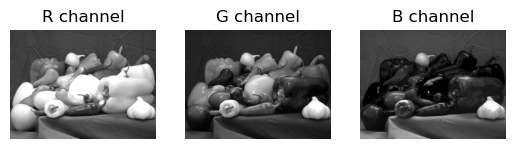

In [4]:
plt.subplot(131)
plt.imshow(R, cmap='gray')
plt.title('R channel')
plt.axis('off')
plt.subplot(132)
plt.imshow(G, cmap='gray')
plt.title('G channel')
plt.axis('off')
plt.subplot(133)
plt.imshow(B, cmap='gray')
plt.title('B channel')
plt.axis('off')

In [5]:
R.shape

(384, 512)

In [6]:
R

array([[ 62,  63,  63, ...,  64,  63,  64],
       [ 63,  61,  59, ...,  61,  58,  56],
       [ 65,  63,  63, ...,  64,  62,  57],
       ...,
       [119, 118, 120, ...,  45,  45,  40],
       [113, 111, 115, ...,  41,  44,  45],
       [111, 114, 115, ...,  40,  42,  46]], dtype=uint8)

## Q2-1. Modify the red component

(-0.5, 511.5, 383.5, -0.5)

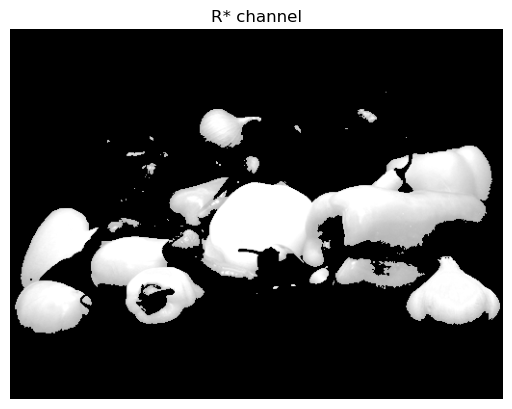

In [7]:
# R^* (x,y)=R(x,y) if R(x,y)>180^0 and R^* (x,y)=0 if R(x,y)‚â§180^0
R_i = copy.deepcopy(R)
G_i = copy.deepcopy(G)
B_i = copy.deepcopy(B)
# G^* (x,y)=0 and B^* (x,y)=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        G_i[i, j] = 0
        B_i[i, j] = 0
        if R[i, j] > 180:
            R_i[i, j] = R[i, j]
        else:
            R_i[i, j] = 0
plt.imshow(R_i, cmap='gray')
plt.title('R* channel')
plt.axis('off')

In [8]:
B_i

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Q2-2. Plot the modified image f^* (x,y)=[R^* (x,y),G^* (x,y),B^* (x,y)]

(-0.5, 511.5, 383.5, -0.5)

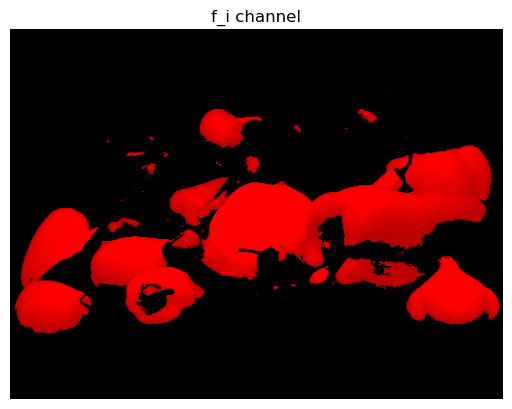

In [9]:
f_i = copy.deepcopy(img[:,:,:])
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        f_i[i, j] = [R_i[i, j], G_i[i, j], B_i[i, j]]
plt.imshow(f_i)
plt.title('f_i channel')
plt.axis('off')

## Q3. modify the image f(x,y) so that only reddish peppers and reddish chili peppers are shown. 

[R, G, B]ÏùºÎïå Í≤ÄÏ†ï[0,0,0], ÌååÎûë[0,0,255], ÎÖπÏÉâ[0,255,0], ÏãúÏïà[0,255,255], Îπ®Í∞ï[255,0,0], ÎßàÏ††ÌÉÄ[255,0,255], ÎÖ∏Îûë[255,255,0], Ìù∞ÏÉâ[255,255,255]

ÌòÑÏû¨ÍπåÏßÄ ÏßÑÌñâÎêú Í≤ÉÏùÑ Í∏∞Î∞òÏùÑ ÏÉùÍ∞ÅÌï¥Î¥§ÏùÑ Îïå, B(x,y) = 0, G(x,y)=0ÏúºÎ°ú ÌñàÏúºÎãà, ÌååÎûë[0,0,255]->[0,0,0]ÏúºÎ°ú Í≤ÄÏ†ïÏù¥ Îê®, ÎÖπÏÉâ[0,255,0]->[0,0,0]ÏúºÎ°ú Í≤ÄÏ†ïÏù¥ Îê®, ÏãúÏïà[0,255,255]->[0,0,0]ÏúºÎ°ú Í≤ÄÏ†ïÏù¥ Îê®, Îπ®Í∞ïÏùÄ Í∑∏ÎåÄÎ°ú Îπ®Í∞ï, ÎßàÏ††ÌÉÄ[255,0,255]->[255,0,0]ÏúºÎ°ú Îπ®Í∞ïÏù¥ Îê®, ÎÖ∏Îûë[255,255,0]->[255,0,0]ÏúºÎ°ú Îπ®Í∞ïÏù¥ Îê®, Ìù∞ÏÉâ[255,255,255]->[255,0,0]ÏúºÎ°ú Îπ®Í∞ïÏù¥ Îê®. Îî∞ÎùºÏÑú f_i = [R_i, G_i, B_i]Ïùò Í≤∞Í≥ºÏóê ÎßàÎäò(Ìù∞ÏÉâ)Ïù¥ Îπ®Í∞ÑÏÉâÏúºÎ°ú Î≥¥Ïù¥Îäî Í≤É

step1. ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÎßàÏ††ÌÉÄ, Ìù∞ÏÉâ, ÎÖ∏ÎûëÏóê ÎåÄÌïú Ï°∞Í±¥ÏùÑ Î®ºÏ†Ä Î∂ÄÏó¨  
step2. Í∑∏ Îã§ÏùåÏóê, B(x,y) = 0, G(x,y)=0ÏúºÎ°ú ÌïúÎã§.  
step3. ÏãúÍ∞ÅÌôîÌï¥ÏÑú Í≤∞Í≥ºÎ•º Î≥∏ Îã§ÏùåÏóê, Îπ®Í∞ÑÏÉâÏùò Î≤îÏúÑÎ•º Ï†ïÌïúÎã§.(Í∑∏Î¶ºÏóê ÌÜ†ÎßàÌÜ†ÎèÑ ÏûàÎäîÎç∞ ÌÜ†ÎßàÌÜ†ÎèÑ Îπ®Í∞ÑÏÉâÏù¥Í∏∞ ÎïåÎ¨∏Ïóê)

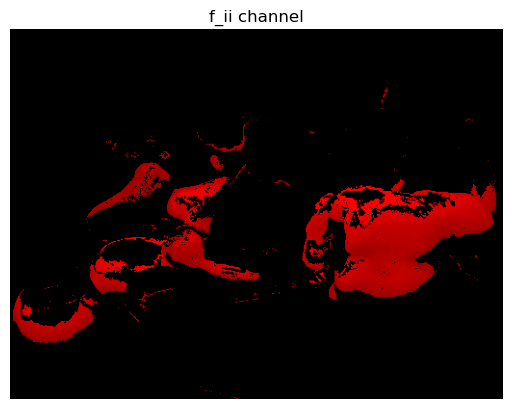

In [10]:
R_ii = copy.deepcopy(R)
f_ii = copy.deepcopy(img[:,:,:])

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        is_white   = R[i, j] > 100 and G[i, j] > 100 and B[i, j] > 100
        is_yellow  = R[i, j] > 180 and G[i, j] > 90 and B[i, j] <= 180
        is_magenta = R[i, j] > 100 and G[i, j] <= 180 and B[i, j] > 180
        is_orange  = R[i, j] > 100 and G[i, j] > 50 and B[i, j] <= 60
        # is_tomato = R[i, j] > 70 and R[i, j] < 180 and G[i, j] < 50 and B[i, j] < 50
        
        if is_white or is_yellow or is_magenta or is_orange:
            R_ii[i, j] = 0  
        elif R[i, j] > 150:
            R_ii[i, j] = R[i, j]
        else:
            R_ii[i, j] = 0
        
        f_ii[i, j] = [R_ii[i, j], 0, 0]  # G, BÎäî Ìï≠ÏÉÅ 0

# ÏãúÍ∞ÅÌôî
plt.imshow(f_ii)
plt.title('f_ii channel')
plt.axis('off')
plt.show()


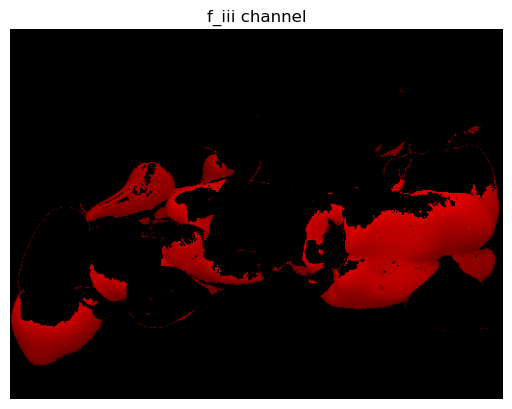

In [35]:
R_iii = copy.deepcopy(R)
f_iii = copy.deepcopy(img[:,:,:])

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        # Ìù∞ÏÉâ: Î™®Îì† Ï±ÑÎÑêÏù¥ Îß§Ïö∞ ÎÜíÏùÄ Í≤ΩÏö∞
        is_white   = R[i, j] > 200 and G[i, j] > 200 and B[i, j] > 200
        # ÎÖ∏ÎûÄÏÉâ: RÍ≥º GÍ∞Ä Îß§Ïö∞ ÎÜíÍ≥† BÍ∞Ä ÎÇÆÏùÄ Í≤ΩÏö∞
        is_yellow  = R[i, j] > 200 and G[i, j] > 200 and B[i, j] < 100
        # ÎßàÏ††ÌÉÄ: RÍ≥º BÍ∞Ä Îß§Ïö∞ ÎÜíÍ≥† GÍ∞Ä ÎÇÆÏùÄ Í≤ΩÏö∞
        is_magenta = R[i, j] > 200 and G[i, j] < 100 and B[i, j] > 200
        # Ïò§Î†åÏßÄ: RÏù¥ Îß§Ïö∞ ÎÜíÍ≥†, GÎäî Ï§ëÍ∞Ñ, BÎäî ÎÇÆÏùÄ Í≤ΩÏö∞
        is_orange  = R[i, j] > 180 and (G[i, j] > 50 and G[i, j] < 100) and B[i, j] < 100
        is_tomato  = R[i, j] > 140 and (G[i, j] > 50 and G[i, j] < 100) and B[i, j] < 100
        
        # ÏúÑ ÏÉâÏÉÅÎì§ÏùÄ Ï†úÍ±∞Ìï©ÎãàÎã§.
        if is_white or is_yellow or is_magenta or is_orange or is_tomato:
            R_iii[i, j] = 0  
        # Îπ®Í∞Ñ ÌååÌîÑÎ¶¨Ïπ¥ÏôÄ Îπ®Í∞Ñ Í≥†Ï∂î: RÏùÄ ÎÜíÍ≥†, GÏôÄ BÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í≤ΩÏö∞
        elif R[i, j] > 100 and G[i, j] < 80 and B[i, j] < 80:
            R_iii[i, j] = R[i, j]
        else:
            R_iii[i, j] = 0
        
        f_iii[i, j] = [R_iii[i, j], 0, 0]  # GÏôÄ BÎäî Ìï≠ÏÉÅ 0ÏúºÎ°ú ÏÑ§Ï†ï

# ÏãúÍ∞ÅÌôî
plt.imshow(f_iii)
plt.title('f_iii channel')
plt.axis('off')
plt.show()


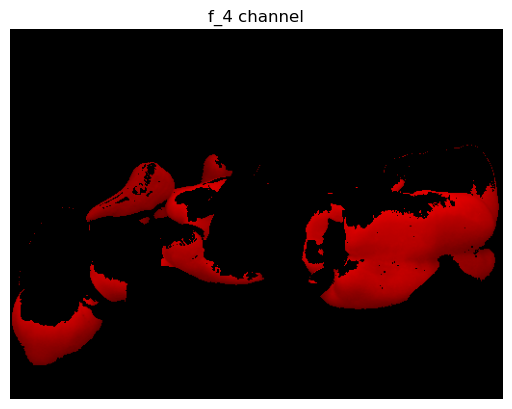

In [11]:
R_4 = copy.deepcopy(R)
f_4 = copy.deepcopy(img[:, :, :])

for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        is_white   = R[i, j] > 200 and G[i, j] > 200 and B[i, j] > 200
        is_yellow  = R[i, j] > 200 and G[i, j] > 200 and B[i, j] < 100
        is_magenta = R[i, j] > 200 and G[i, j] < 100 and B[i, j] > 200
        is_orange  = R[i, j] > 150 and (G[i, j] > 50 and G[i, j] < 100) and B[i, j] < 100
        is_tomato  = R[i, j] > 100 and ((G[i, j] >= 80) or (B[i, j] >= 80))
        
        # ÏúÑ ÏÉâÏÉÅÎì§ÏùÄ Ï†úÍ±∞Ìï©ÎãàÎã§.
        if is_white or is_yellow or is_magenta or is_orange or is_tomato:
            R_4[i, j] = 0  
        elif R[i, j] > 100 and G[i, j] < 100 and B[i, j] < 90 and (R[i, j] - max(G[i, j], B[i, j]) > 80):
            R_4[i, j] = R[i, j]
        else:
            R_4[i, j] = 0
        
        f_4[i, j] = [R_4[i, j], 0, 0]  # GÏôÄ BÎäî Ìï≠ÏÉÅ 0ÏúºÎ°ú ÏÑ§Ï†ï

# ÏãúÍ∞ÅÌôî
plt.imshow(f_4)
plt.title('f_4 channel')
plt.axis('off')
plt.show()


## Q4-1. Plot the histogram of I(x,y) to check the intensity distribution.

Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÎÑàÎ¨¥ Î∞ùÏùÄ Î∂ÄÎ∂ÑÏù¥ÎÇò ÎÑàÎ¨¥ Ïñ¥ÎëêÏö¥ Î∂ÄÎ∂ÑÏùÄ ÏûêÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÑ Î≥¥Í∏∞ Ïñ¥Î†µÎã§. Í∑∏ Ïù¥Ïú†Îäî ÎπÑÏä∑Ìïú intensityÎ•º Í∞ñÎäî ÌîΩÏÖÄÎì§Ïù¥ Ìïú Í≥≥Ïóê Î™®Ïó¨ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. Ïó¨Í∏∞ÏÑú intensityÎûÄ Í∑∏Î†àÏù¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú 0(Í≤ÄÏ†ïÏÉâ), 255(Ìù∞ÏÉâ)Í∞íÏùÑ ÎßêÌïúÎã§. RGBÏóêÏÑúÎäî Í∞Å Ï±ÑÎÑê Îãπ intensityÎ•º Í∞ñÎäîÎã§. ÌîΩÏÑπÎì§Ïùò intensityÎ•º Î≥ÄÍ≤ΩÌïòÍ≤å ÎêòÎ©¥, Ïù¥Ïóê Îî∞Îùº ÌûàÏä§ÌÜ†Í∑∏Îû®ÎèÑ Î≥ÄÍ≤ΩÎêòÎäîÎç∞ Ïù¥Î•º histofram modeling or transferÎùºÍ≥† ÌïúÎã§. ÎåÄÌëúÏ†ÅÏù∏ histogram modelingÏù¥ histogram equalizationÏù¥Îã§. histogram equalizationÏùò Î™©Ï†ÅÏùÄ intensityÎì§Ïù¥ Í≥®Í≥†Î£® ÏÇ¨Ïö©ÎêòÍ≤å ÌïòÎäî Í≤ÉÏù¥Îã§.  
openCVÏóêÏÑúÎäî CDFÎ°ú histogram equalizationÏùÑ ÌïúÎã§. 

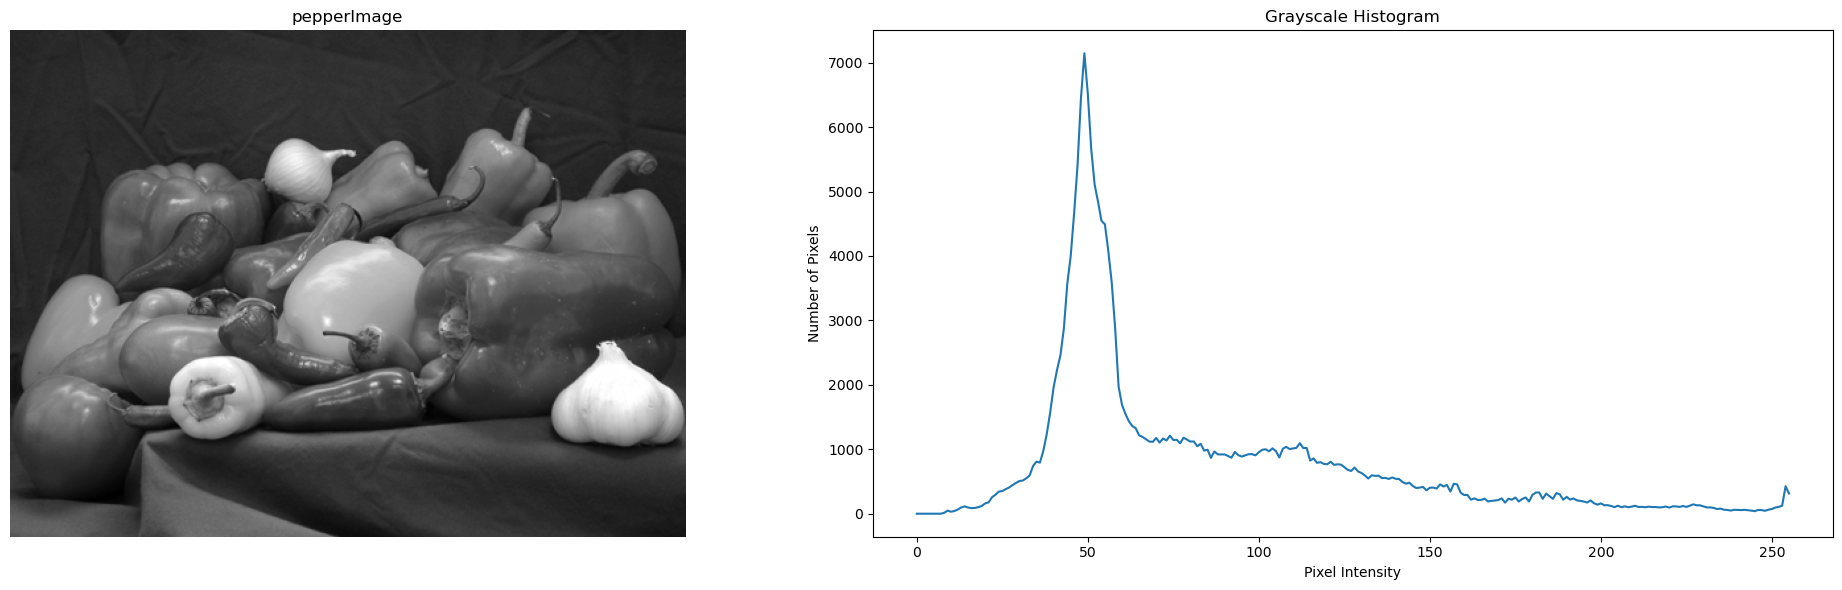

In [19]:
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
histogram = cv2.calcHist([img2], [0], None, [256], [0, 256]) #(Ïù¥ÎØ∏ÏßÄ, Ï±ÑÎÑê, ÎßàÏä§ÌÅ¨, ÌûàÏä§ÌÜ†Í∑∏Îû® ÌÅ¨Í∏∞, Î≤îÏúÑ)

plt.figure(figsize=(30, 6))

plt.subplot(131)
plt.imshow(img2, cmap='gray')
plt.title('pepperImage')
plt.axis('off')

plt.subplot(132)
plt.plot(histogram)
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.title('Grayscale Histogram')

plt.tight_layout()
plt.show()

https://www.geeksforgeeks.org/opencv-python-program-analyze-image-using-histogram/

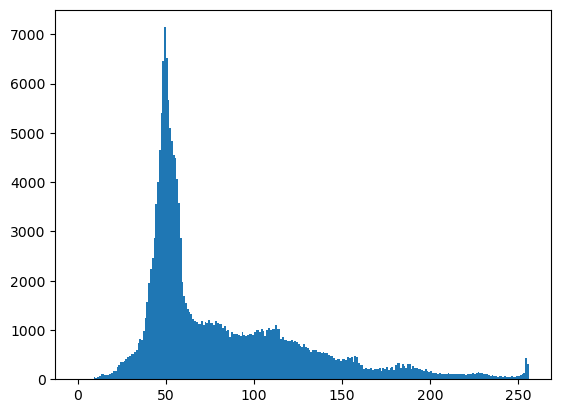

In [13]:
plt.hist(img2.ravel(), 256, [0, 256])
plt.show()

## Q4-2. Using a histogram equalization method, make a new image I^* (x,y) from I(x,y) so that the intensity is uniformly distributed

### numpyÎ•º Ïù¥Ïö©Ìï¥ÏÑú histogram equlization

ÎàÑÏ†ÅÎ∂ÑÌè¨Ìï®Ïàò(cdf) : ÎûúÎçò Î≥ÄÏàòÍ∞Ä ÌäπÏ†ï Í∞íÎ≥¥Îã§ ÏûëÍ±∞ÎÇò Í∞ôÏùÑ ÌôïÎ•†Î•º ÎÇòÌÉÄÎÇ¥Îäî Ìï®Ïàò, ÌäπÏ†ï Í∞íÎ≥¥Îã§ ÏûëÏùÄ Í∞íÎì§Ïùò ÌôïÎ•†Î•º Î™®Îëê ÎàÑÏ†ÅÌï¥ÏÑú Íµ¨ÌïúÎã§.

ÌûàÏä§ÌÜ†Í∑∏Îû® Ìï®Ïàò h(g) Íµ¨ÌïòÍ∏∞ -> Ï†ïÍ∑úÌôîÎêú ÌûàÏä§ÌÜ†Í∑∏Îû® Ìï®Ïàò Íµ¨ÌïòÍ∏∞ p(g) = h(g)/(w*h) -> cdf Ìï®Ïàò Íµ¨ÌïòÍ∏∞ -> Î≥ÄÌôò Ìï®Ïàò dst(x,y) = round(cdf(src(x,y))*L_max)  
https://overface.tistory.com/597

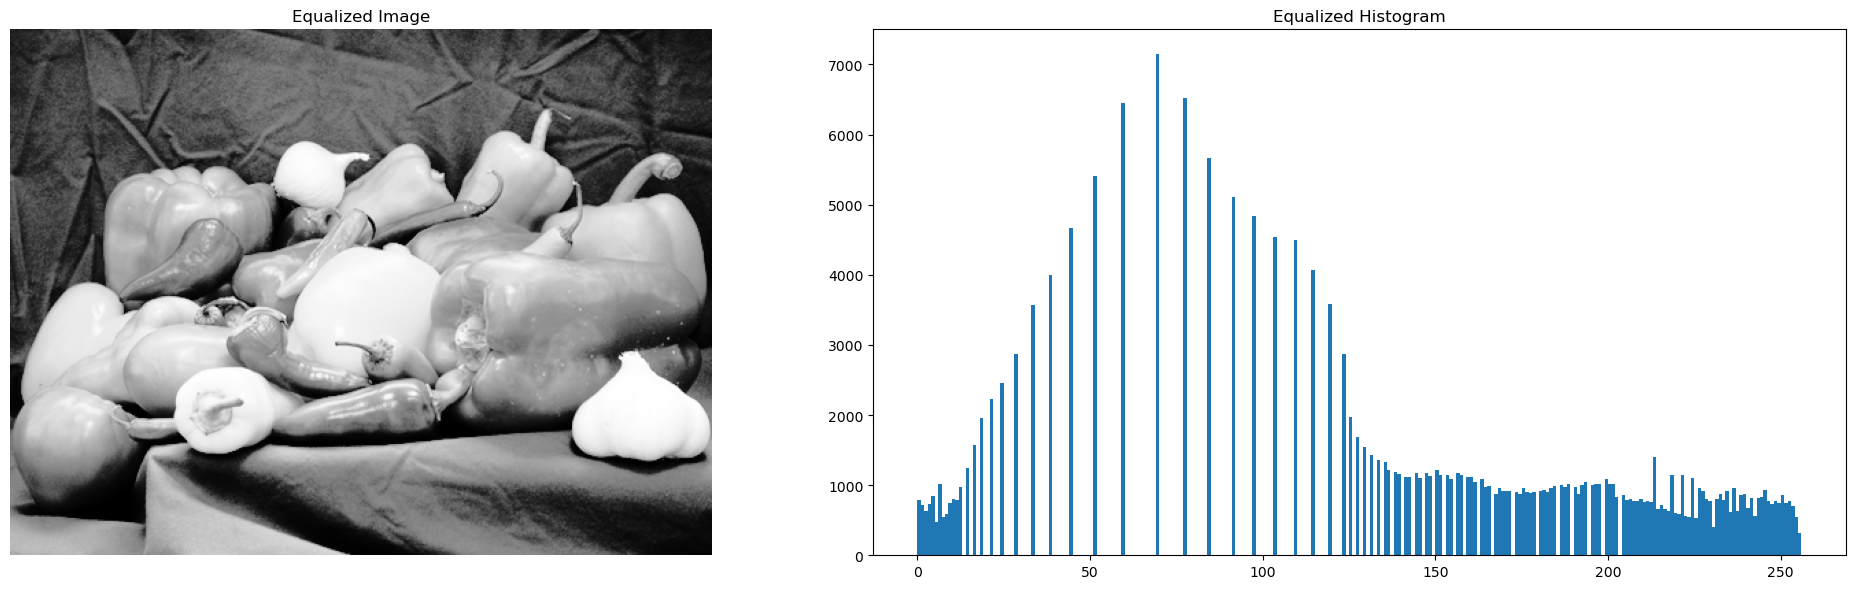

In [14]:
hist, bins = np.histogram(img2.flatten(), 256, [0, 256]) # flatten() : 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôò, (input data, bins, range, density, weights)
cdf = hist.cumsum() # ÎàÑÏ†ÅÌï© -> Ïù¥Î†áÍ≤å Í≥ÑÏÇ∞ÌïòÎ©¥ cdfÏùÄ 0~cdf.max() ÏÇ¨Ïù¥Ïùò Í∞íÏù¥ ÎêúÎã§.
# pdfÏùÄ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Ï†ïÍ∑úÌôîÌïú Í≤É, cdfÏùÄ pdfÏùò ÎàÑÏ†ÅÌï©ÏúºÎ°ú Ïñ¥ÎëêÏö¥ ÌîΩÏÖÄÎ∂ÄÌÑ∞ Ï∞®Í≥°Ï∞®Í≥° ÎçîÌïú ÌôïÎ•† Í∞íÏù¥Îã§. cdfÏùÄ ÌîΩÏÖÄ Í∞íÏùÑ ÏÉàÎ°úÏö¥ Î∞ùÍ∏∞ Í∞íÏúºÎ°ú Îß§ÌïëÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©ÌïòÎäîÎç∞ 0~1ÏÇ¨Ïù¥
# Í∞íÏù¥ ÏïÑÎãàÎùº ÎàÑÏ†Å Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê 0~255 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî Ìï¥Ï§òÏïº ÌïúÎã§.
# cdf_normalized = cdf * float(hist.max()) / cdf.max() # cdfÎ•º ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï†ïÍ∑úÌôî

cdf_m = np.ma.masked_equal(cdf,0) # cdfÏóêÏÑú 0Ïù∏ Í∞íÏùÄ Î¨¥ÏãúÌïòÍ≥† ÎÇòÎ®∏ÏßÄ Í∞íÎßåÏùÑ Í∞ÄÏßÄÍ≥† cdfÎ•º Í≥ÑÏÇ∞
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) # cdfÎ•º 0~255 ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôî 
cdf = np.ma.filled(cdf_m, 0).astype('uint8') # cdfÎ•º uint8Î°ú Î≥ÄÌôò
equalized_img = cdf[img2] # cdfÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò ÌîΩÏÖÄ Í∞íÏùÑ ÏÉàÎ°úÏö¥ Î∞ùÍ∏∞ Í∞íÏúºÎ°ú Îß§Ìïë

plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(132)
plt.hist(equalized_img.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.tight_layout()
plt.show()

Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌùêÎ¶ÑÏùÄ, ÌûàÏä§ÌÜ†Í∑∏Îû®Í≥ÑÏÇ∞ & cdf Í≥ÑÏÇ∞ -> cdfÏóêÏÑú 0 Ï†úÍ±∞ & Ï†ïÍ∑úÌôî -> ÌîΩÏÖÄ Í∞í Îß§Ìïë & ÌèâÌôúÎêú Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±

## openCV Ìï®Ïàò ÌôúÏö©ÌïòÍ∏∞

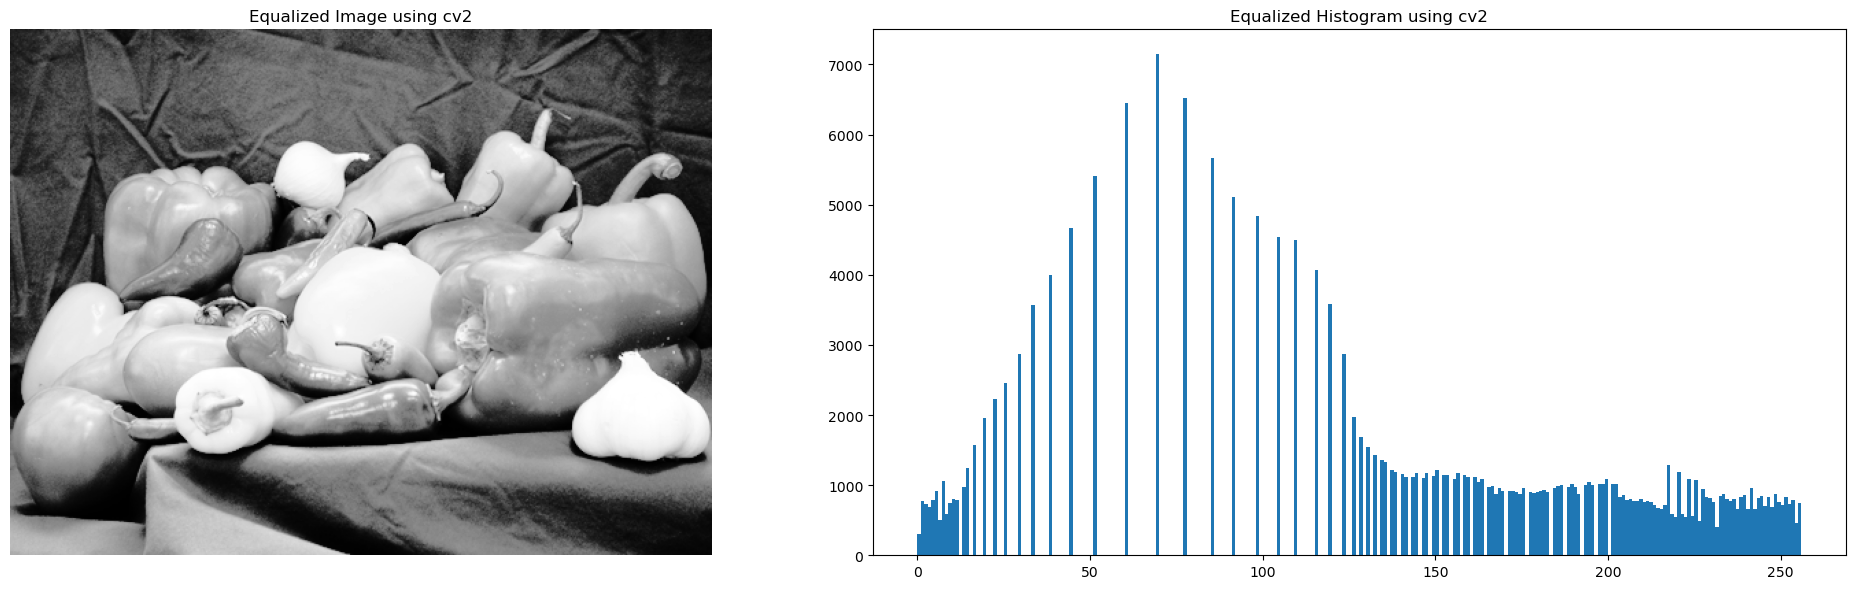

In [31]:
equalized_img2 = cv2.equalizeHist(img2) # cv2Î•º Ïù¥Ïö©Ìïú ÌûàÏä§ÌÜ†Í∑∏Îû® ÌèâÌôúÌôî
plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.imshow(equalized_img2, cmap='gray')
plt.title('Equalized Image using cv2')
plt.axis('off')

plt.subplot(132)
plt.hist(equalized_img2.ravel(), 256, [0, 256])
plt.title('Equalized Histogram using cv2')
plt.tight_layout()
plt.show()

##  Q5-1. Make a new image I^(**) (x,y) so that the intensity values in the image have the Gaussian distribution. 

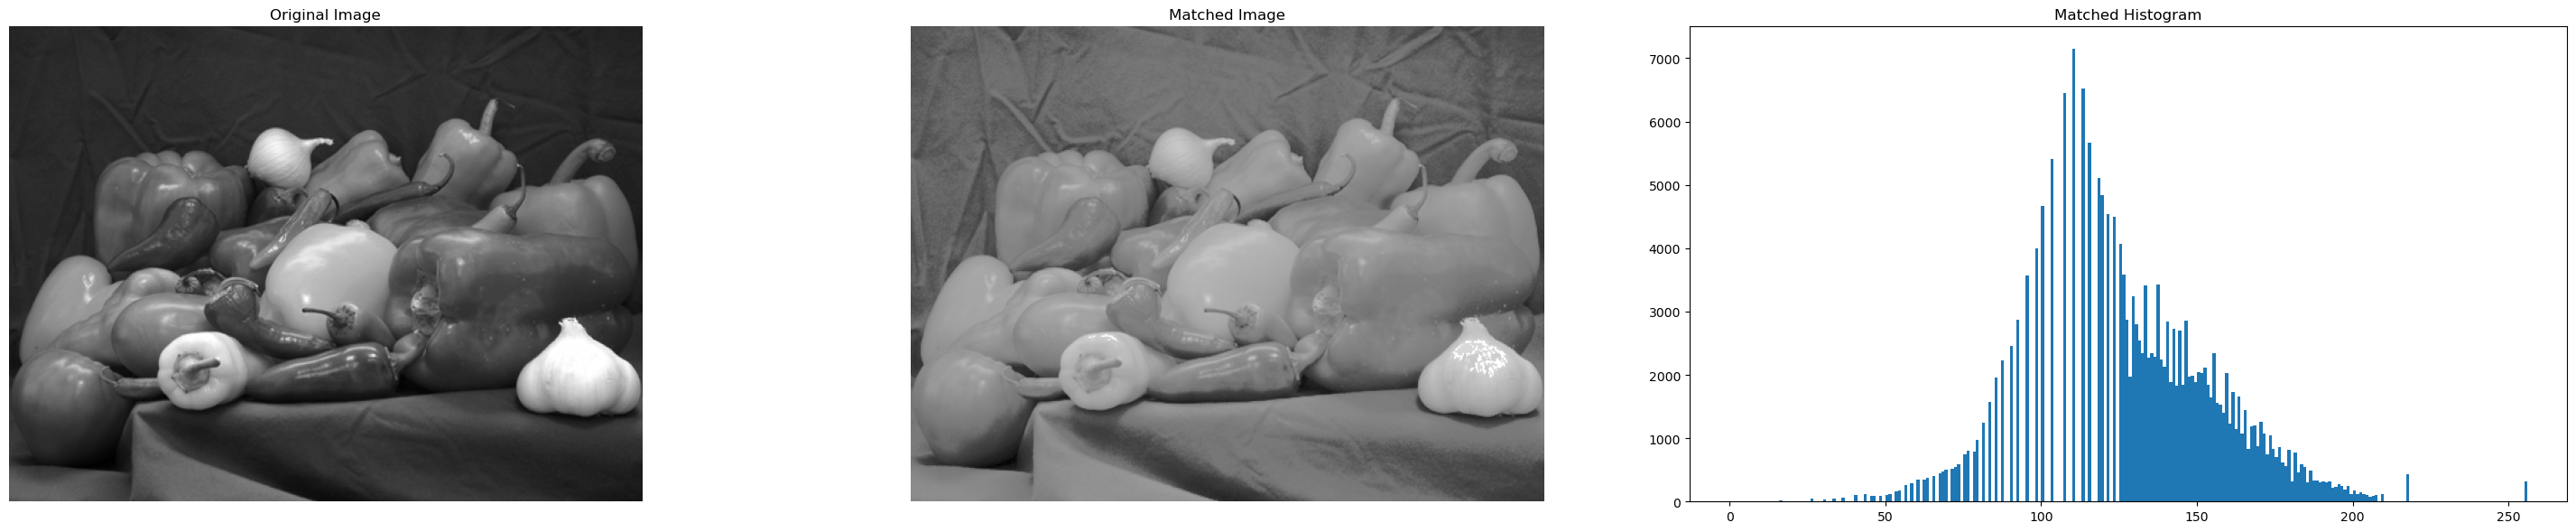

In [59]:
# Í∞ÄÏö∞ÏãúÏïàÏùÄ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌôïÎ•† Î∞ÄÎèÑ Ìï®ÏàòÎ°ú, ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î°ú Ï†ïÏùòÎêúÎã§.
mean = 130
std = 30
gaussian_img = np.random.normal(mean, std, img2.shape)
gaussian_img = np.clip(gaussian_img, 0, 255).astype(np.uint8) # 0~255 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú ÌÅ¥Î¶¨Ìïë
matched_img = match_histograms(img2, gaussian_img, channel_axis=None) # ÌûàÏä§ÌÜ†Í∑∏Îû® Îß§Ïπ≠

plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

plt.subplot(133)
plt.hist(matched_img.ravel(), 256, [0, 256])
plt.title('Matched Histogram')
plt.tight_layout()
plt.show()

(150, 30)

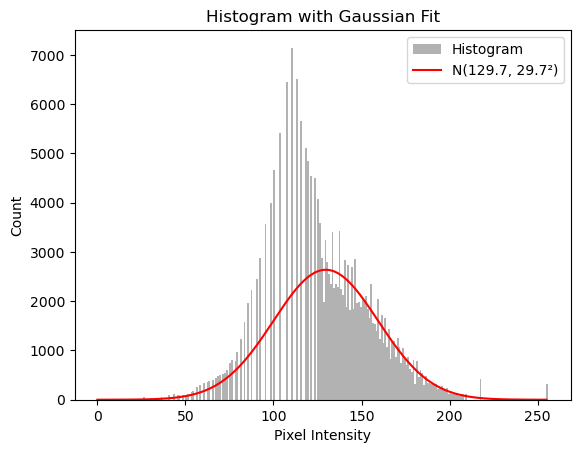

In [60]:
from scipy.stats import norm

# Ï†ïÍ∑úÎ∂ÑÌè¨ Í≥°ÏÑ†Ïö© xÏ∂ï
x = np.linspace(0, 255, 256)
mean_val = np.mean(matched_img)
std_val = np.std(matched_img)
pdf = norm.pdf(x, mean_val, std_val) * matched_img.size  # Ïä§ÏºÄÏùº ÎßûÏ∂§

plt.hist(matched_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.6, label='Histogram')
plt.plot(x, pdf, 'r-', label=f'N({mean_val:.1f}, {std_val:.1f}¬≤)')
plt.title('Histogram with Gaussian Fit')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()
plt.show()


Í∏∞Ï§Ä : Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤¥Ïóê Î∞ùÍ≥† Ïñ¥ÎëêÏö¥ ÌîΩÏÖÄÏù¥ Í≥†Î•¥Í≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎäîÍ∞Ä, Í≤ΩÍ≥ÑÍ∞Ä ÎöúÎ†∑ÌïòÏßÄ ÏïäÍ≥† Î∞ùÍ∏∞ Î≥ÄÌôîÍ∞Ä Î∂ÄÎìúÎü¨Ïö¥Í∞Ä, Í±∞Ïùò Î™®Îì† Î∞ùÍ∏∞ Íµ¨Í∞Ñ(Ïòà: 50~200)ÏùÑ Ï†ÅÏ†àÌûà Ìè¨Ìï®ÌïòÎäîÍ∞Ä

ÏõêÎ≥∏Î≥¥Îã§ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Î∞ùÏùÄ Î∂ÄÎ∂ÑÏù¥ Ï¶ùÍ∞ÄÌïòÍ≥† Ïñ¥ÎëêÏö¥ Î∂ÄÎ∂ÑÏùÄ Ï§ÑÏñ¥Îì§Ïñ¥, Í∞ÄÏö∞ÏãúÏïà Î∂ÑÌè¨Ïùò Ï§ëÏã¨Ïù¥ Î∞òÏòÅÎêú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. 

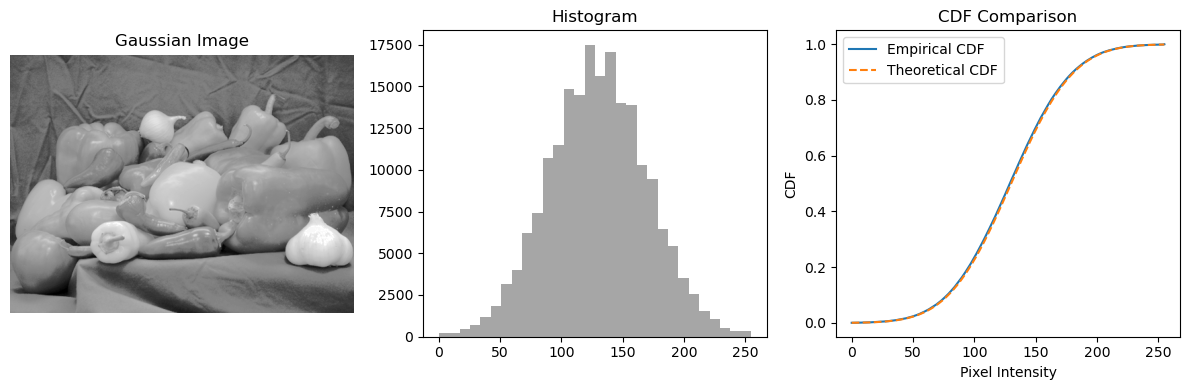

In [ ]:
from scipy.stats import norm

mean = 130
std = 40

gaussian_img = np.random.normal(mean, std, img2.shape)
gaussian_img = np.clip(gaussian_img, 0, 255).astype(np.uint8)
from skimage.exposure import match_histograms

matched_img = match_histograms(img2, gaussian_img, channel_axis=None)

# 2. ÌûàÏä§ÌÜ†Í∑∏Îû® Î∞è CDF Í≥ÑÏÇ∞
hist, bins = np.histogram(gaussian_img.flatten(), bins=256, range=[0, 256])
cdf_empirical = hist.cumsum()
cdf_empirical = cdf_empirical / cdf_empirical[-1]  # Ï†ïÍ∑úÌôî

# 3. Ïù¥Î°†Ï†Å Ï†ïÍ∑úÎ∂ÑÌè¨ CDF Í≥ÑÏÇ∞
x_vals = np.arange(256)
cdf_theoretical = norm.cdf(x_vals, loc=mean, scale=std)

# 4. ÏãúÍ∞ÅÌôî

# üì∑ Í∞ÄÏö∞ÏãúÏïà Ïù¥ÎØ∏ÏßÄ
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(matched_img, cmap='gray')
plt.title("Gaussian Image")
plt.axis('off')

# üìä ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.subplot(1, 3, 2)
plt.hist(gaussian_img.ravel(), bins=30, color='gray', alpha=0.7)
plt.title("Histogram")

# üìà CDF ÎπÑÍµê
plt.subplot(1, 3, 3)
plt.plot(x_vals, cdf_empirical, label="Empirical CDF")
plt.plot(x_vals, cdf_theoretical, label="Theoretical CDF", linestyle='--')
plt.title("CDF Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("CDF")
plt.legend()

plt.tight_layout()
plt.show()


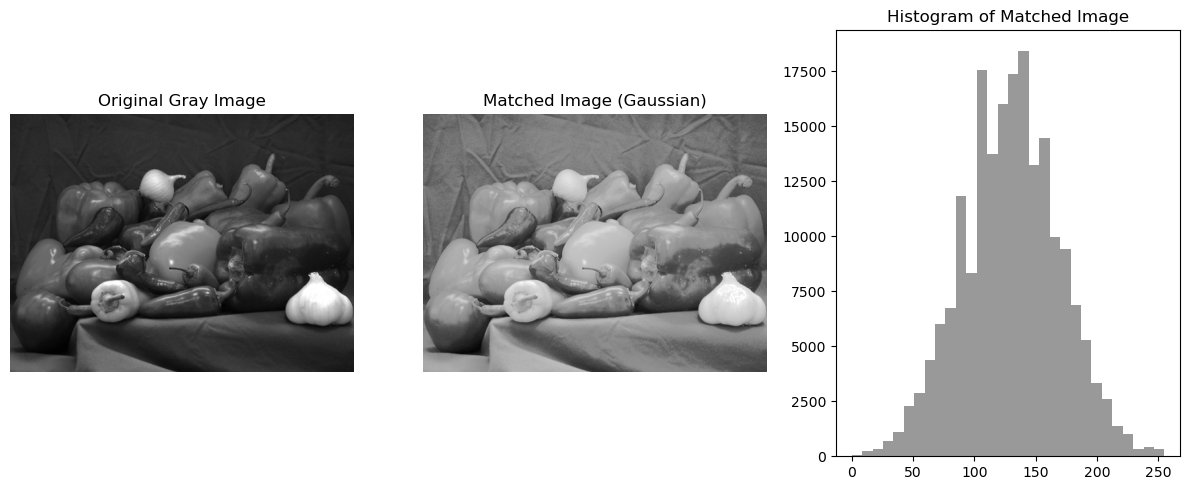

In [47]:
from scipy.stats import norm

# 1. Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. ÏõêÎ≥∏ grayscale Ïù¥ÎØ∏ÏßÄÏùò CDF Í≥ÑÏÇ∞
hist, _ = np.histogram(gray.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf = cdf / cdf[-1]  # Ï†ïÍ∑úÌôîÎêú CDF [0~1]

# 3. Ï†ïÍ∑úÎ∂ÑÌè¨ PDF, CDF ÏÉùÏÑ± (Î™©Ìëú Î∂ÑÌè¨)
mean = 130
std = 40
x = np.arange(256)
pdf = norm.pdf(x, loc=mean, scale=std)
pdf /= pdf.sum()  # Ï†ïÍ∑úÌôî
target_cdf = np.cumsum(pdf)

# 4. CDF Í∏∞Î∞ò ÌûàÏä§ÌÜ†Í∑∏Îû® Îß§Ïπ≠
mapping = np.interp(cdf, target_cdf, x)
matched_img = mapping[gray].astype(np.uint8)

# 5. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(matched_img, cmap='gray')
plt.title('Matched Image (Gaussian)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.hist(matched_img.ravel(), bins=30, color='gray', alpha=0.8)
plt.title('Histogram of Matched Image')

plt.tight_layout()
plt.show()

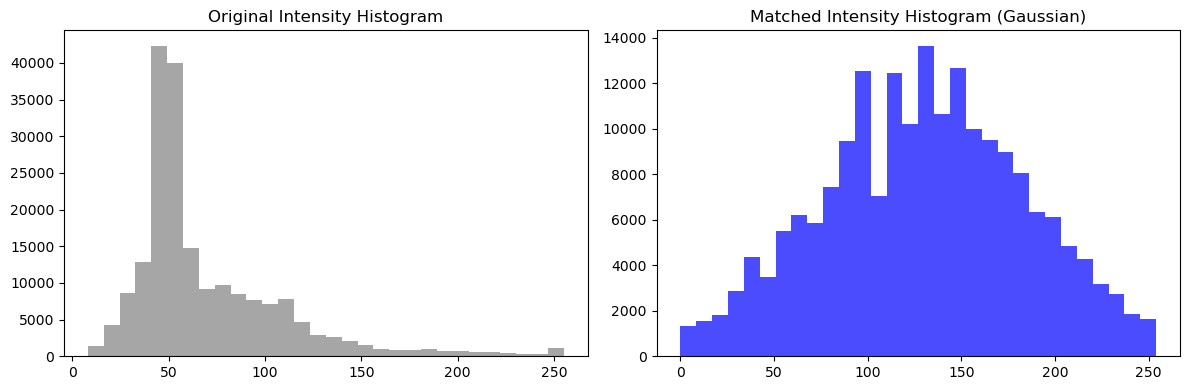

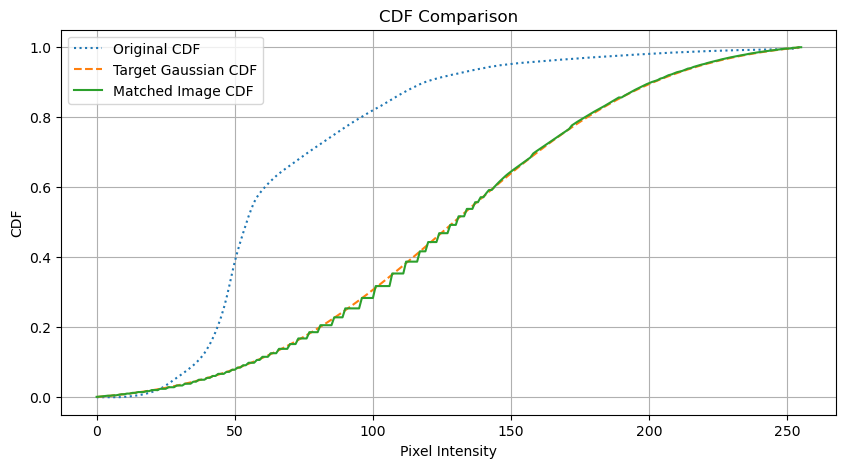

üìä MSE between Matched CDF and Target Gaussian CDF: 0.000034


In [45]:
# 5. Îß§Ïπ≠Îêú Ïù¥ÎØ∏ÏßÄÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®Í≥º CDF
hist_matched, _ = np.histogram(matched_img.flatten(), 256, [0, 256])
cdf_matched = hist_matched.cumsum()
cdf_matched = cdf_matched / cdf_matched[-1]
from sklearn.metrics import mean_squared_error
# 6. MSE (CDF Í∏∞Ï§Ä) Í≥ÑÏÇ∞
mse_cdf = mean_squared_error(target_cdf, cdf_matched)

# =======================
# üéØ 1. ÌûàÏä§ÌÜ†Í∑∏Îû® ÎπÑÍµê
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), bins=30, color='gray', alpha=0.7)
plt.title("Original Intensity Histogram")

plt.subplot(1, 2, 2)
plt.hist(matched_img.ravel(), bins=30, color='blue', alpha=0.7)
plt.title("Matched Intensity Histogram (Gaussian)")

plt.tight_layout()
plt.show()

# =======================
# üéØ 2. CDF ÎπÑÍµê
plt.figure(figsize=(10, 5))
plt.plot(x, cdf, label='Original CDF', linestyle='dotted')
plt.plot(x, target_cdf, label='Target Gaussian CDF', linestyle='--')
plt.plot(x, cdf_matched, label='Matched Image CDF', linestyle='-')
plt.title("CDF Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

# =======================
# üéØ 3. MSE Ï∂úÎ†•
print(f"üìä MSE between Matched CDF and Target Gaussian CDF: {mse_cdf:.6f}")